In [104]:
import pandas as pd
import numpy as np

In [105]:
kio_data=pd.read_csv("data/final_data.csv")

In [106]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,0,0,0,0,1,05-24,16,월
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,0,2,0,0,1,0,05-24,16,월
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,0,0,0,1,2,0,0,05-24,16,월
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,1,0,0,0,0,05-24,16,월


# 카테고리화 전처리

## 2. 데이터 전처리

### 1) 휴일 컬럼 생성
* 평일(0)  / 주말(1)

* 설문 데이터셋의 경우 기간이 짧아 모든 요일을 반영하기 어렵다고 판단

In [107]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"요일"]=="일":
        kio_data.loc[i,"휴일"]= "주말"
    else:
        kio_data.loc[i,"휴일"]= "평일"
        
        
kio_data['휴일'] = kio_data['휴일']

In [108]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,2,0,0,1,05-16,14,일,주말
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,1,0,2,0,0,05-16,15,일,주말
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,3,3,0,0,0,05-16,15,일,주말
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,0,0,0,05-16,15,일,주말
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,2,0,0,0,05-16,16,일,주말
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,0,0,0,1,05-24,16,월,평일
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,2,0,0,1,0,05-24,16,월,평일
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,0,0,1,2,0,0,05-24,16,월,평일
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,1,0,0,0,0,05-24,16,월,평일


### 2) 비 컬럼 생성

* 강수 유무로 변경
* 비 X : 비안옴 , 비 O : 비옴

In [109]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"강수량"] == 0:
        kio_data.loc[i,"비"] = "비안옴"
    else:
        kio_data.loc[i,"비"]="비옴"
        
        
kio_data['비'] = kio_data['비']

### 3) 구름 컬럼 생성
* [기상청 전운량](https://www.weather.go.kr/weather/climate/past_cal.jsp)을 기준으로 하여 
* 맑음(0\~5) : 0 , 구름많음(6\~8) : 1, 흐림(9\~10) : 2으로 변경


In [110]:
kio_data.loc[(kio_data['전운량']>=0) & (kio_data['전운량']<=5), '구름']="맑음"

kio_data.loc[(kio_data['전운량']>=6) & (kio_data['전운량']<=8), '구름']="구름많음"

kio_data.loc[(kio_data['전운량']>=9) & (kio_data['전운량']<=10), '구름']="흐림"

kio_data['전운량'].unique()

array([10,  9,  6,  7,  8,  5,  2,  1,  4,  0,  3], dtype=int64)

In [111]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,1,05-16,14,일,주말,비옴,흐림
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,2,0,0,05-16,15,일,주말,비옴,흐림
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,3,0,0,0,05-16,15,일,주말,비옴,흐림
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,0,05-16,15,일,주말,비옴,흐림
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,0,05-16,16,일,주말,비옴,흐림
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,0,1,05-24,16,월,평일,비안옴,맑음
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,0,1,0,05-24,16,월,평일,비안옴,맑음
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,1,2,0,0,05-24,16,월,평일,비안옴,맑음
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,0,0,05-24,16,월,평일,비안옴,맑음


### 4) 시간대 컬럼생성
* 아침(나머지) : 0 , 점심(11\~16) : 1, 저녁(16\~23) : 2으로 변경

In [112]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"시간"]>=16 and kio_data.loc[i,"시간"]<=23:
        kio_data.loc[i,"식사시간"]="저녁"
    elif kio_data.loc[i,"시간"]>=11 and kio_data.loc[i,"시간"]<16:
        kio_data.loc[i,"식사시간"]='점심'
    else:
        kio_data.loc[i,"식사시간"]="아침"
kio_data["식사시간"] = kio_data["식사시간"]

In [113]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름,식사시간
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,일,주말,비옴,흐림,점심
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,일,주말,비옴,흐림,점심
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,일,주말,비옴,흐림,저녁
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,1,05-24,16,월,평일,비안옴,맑음,저녁
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,1,0,05-24,16,월,평일,비안옴,맑음,저녁
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,2,0,0,05-24,16,월,평일,비안옴,맑음,저녁
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,0,05-24,16,월,평일,비안옴,맑음,저녁


##  클러스터 필요 데이터만 추출 및 전처리

### 인구 통계학부분  카테고리화

In [114]:
# 카테고리화가 가능한 데이터만 추출
cate_data=kio_data[["성별","연령대","기분","구름","휴일","식사시간","비"]]
cate_data

,성별,연령대,기분,구름,휴일,식사시간,비
0,남자,청년,행복,흐림,주말,점심,비옴
1,여자,중장년,분노,흐림,주말,점심,비옴
2,남자,청년,중립,흐림,주말,점심,비옴
3,여자,청년,행복,흐림,주말,점심,비옴
4,남자,청년,행복,흐림,주말,저녁,비옴
...,...,...,...,...,...,...,...
416,남자,노년,행복,맑음,평일,저녁,비안옴
417,남자,노년,행복,맑음,평일,저녁,비안옴
418,여자,노년,행복,맑음,평일,저녁,비안옴
419,남자,노년,우울,맑음,평일,저녁,비안옴


In [115]:
cate_data["기분"].unique()

array(['행복', '분노', '중립', '우울'], dtype=object)

In [116]:
## 성별 카테고리화
for i in range(len(cate_data)):
    if cate_data.loc[i,"성별"]=="남자":
        cate_data.loc[i,"성별"]= 0
    else:
        cate_data.loc[i,"성별"]= 1
        
        


C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-116-1a967bab2ea4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"성별"]= 0
<ipython-input-116-1a967bab2ea4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"성별"]= 1


In [117]:
## 연령대 카테고리화

for i in range(len(cate_data)):
    if cate_data.loc[i,"연령대"]=="청소년":
        cate_data.loc[i,"연령대"]= 0
    elif cate_data.loc[i,"연령대"]=="청년":
        cate_data.loc[i,"연령대"]= 1
    elif cate_data.loc[i,"연령대"]=="중장년":
        cate_data.loc[i,"연령대"]= 2
    else:
        cate_data.loc[i,"연령대"]= 3

<ipython-input-117-96a363a5b125>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"연령대"]= 1
<ipython-input-117-96a363a5b125>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"연령대"]= 2
<ipython-input-117-96a363a5b125>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"연령대"]= 0
<ipython-input-117-96a363a5b125>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [118]:
## 기뷴 카테고리화

for i in range(len(cate_data)):
    if cate_data.loc[i,"기분"]=="행복":
        cate_data.loc[i,"기분"]= 0
    elif cate_data.loc[i,"기분"]=="중립":
        cate_data.loc[i,"기분"]= 1
    elif cate_data.loc[i,"기분"]=="우울":
        cate_data.loc[i,"기분"]= 2
    elif cate_data.loc[i,"기분"]=="분노":
        cate_data.loc[i,"기분"]= 3

<ipython-input-118-72d87ebd1d78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"기분"]= 0
<ipython-input-118-72d87ebd1d78>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"기분"]= 3
<ipython-input-118-72d87ebd1d78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"기분"]= 1
<ipython-input-118-72d87ebd1d78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [119]:
## 구름 카테고리화

for i in range(len(cate_data)):
    if cate_data.loc[i,"구름"]=="맑음":
        cate_data.loc[i,"구름"]= 0
    elif cate_data.loc[i,"구름"]=="구름많음":
        cate_data.loc[i,"구름"]= 1
    else:
        cate_data.loc[i,"구름"]= 2

<ipython-input-119-08da1d05e8a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"구름"]= 2
<ipython-input-119-08da1d05e8a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"구름"]= 1
<ipython-input-119-08da1d05e8a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"구름"]= 0


In [120]:
##  카테고리화

for i in range(len(cate_data)):
    if cate_data.loc[i,"휴일"]=="평일":
        cate_data.loc[i,"휴일"]= 0
   
    else:
        cate_data.loc[i,"휴일"]= 1

<ipython-input-120-01d94c4f6bb1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"휴일"]= 1
<ipython-input-120-01d94c4f6bb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"휴일"]= 0


In [121]:
## 날씨 카테고리화

for i in range(len(cate_data)):
    if cate_data.loc[i,"식사시간"]=="아침":
        cate_data.loc[i,"식사시간"]= 0
    elif cate_data.loc[i,"식사시간"]=="점심":
        cate_data.loc[i,"식사시간"]= 1
    else:
        cate_data.loc[i,"식사시간"]= 2

<ipython-input-121-70c2cb03026a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"식사시간"]= 1
<ipython-input-121-70c2cb03026a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"식사시간"]= 2
<ipython-input-121-70c2cb03026a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"식사시간"]= 0


In [122]:
## 날씨 카테고리화

for i in range(len(cate_data)):
    if cate_data.loc[i,"비"]=="비안옴":
        cate_data.loc[i,"비"]= 0
    else:
        cate_data.loc[i,"비"]= 1
        

<ipython-input-122-e9c25f6cbaf9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"비"]= 1
<ipython-input-122-e9c25f6cbaf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data.loc[i,"비"]= 0


In [123]:
cate_data

,성별,연령대,기분,구름,휴일,식사시간,비
0,0,1,0,2,1,1,1
1,1,2,3,2,1,1,1
2,0,1,1,2,1,1,1
3,1,1,0,2,1,1,1
4,0,1,0,2,1,2,1
...,...,...,...,...,...,...,...
416,0,3,0,0,0,2,0
417,0,3,0,0,0,2,0
418,1,3,0,0,0,2,0
419,0,3,2,0,0,2,0


## 데이터 표준화


In [124]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
cate_data_sd=pd.DataFrame(sd.fit_transform(cate_data))

In [125]:
cate_data_sd

,0,1,2,3,4,5,6
0,-0.839317,-0.184704,-0.891734,1.036588,1.409190,-0.600183,1.162736
1,1.191445,0.852103,2.450284,1.036588,1.409190,-0.600183,1.162736
2,-0.839317,-0.184704,0.222272,1.036588,1.409190,-0.600183,1.162736
3,1.191445,-0.184704,-0.891734,1.036588,1.409190,-0.600183,1.162736
4,-0.839317,-0.184704,-0.891734,1.036588,1.409190,0.827371,1.162736
...,...,...,...,...,...,...,...
416,-0.839317,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040
417,-0.839317,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040
418,1.191445,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040
419,-0.839317,1.888910,1.336278,-1.071642,-0.709628,0.827371,-0.860040


In [126]:
cate_data_sd.rename(columns={0:'성별',1:'연령대',2:'기분',3:'구름',4:'휴일',5:'식사시간',6:'비'},inplace=True)

In [127]:
cate_data_sd

,성별,연령대,기분,구름,휴일,식사시간,비
0,-0.839317,-0.184704,-0.891734,1.036588,1.409190,-0.600183,1.162736
1,1.191445,0.852103,2.450284,1.036588,1.409190,-0.600183,1.162736
2,-0.839317,-0.184704,0.222272,1.036588,1.409190,-0.600183,1.162736
3,1.191445,-0.184704,-0.891734,1.036588,1.409190,-0.600183,1.162736
4,-0.839317,-0.184704,-0.891734,1.036588,1.409190,0.827371,1.162736
...,...,...,...,...,...,...,...
416,-0.839317,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040
417,-0.839317,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040
418,1.191445,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040
419,-0.839317,1.888910,1.336278,-1.071642,-0.709628,0.827371,-0.860040


# 피쳐간 상관관계

In [128]:
%matplotlib inline 

# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함

import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
## heatmap 그리기 

def corr_heat_map(data,method,figsize):
    # corr
    result=data.corr(method=method)
    
    #figsize
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    
    return sns.heatmap(result,
            annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

<AxesSubplot:>

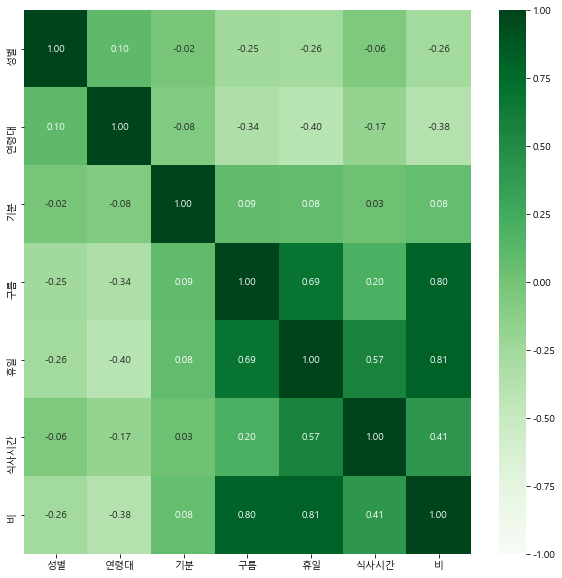

In [129]:
corr_heat_map(cate_data_sd,"kendall",10)

##  Kmeans , Kmedia 용 데이터 따로 저장

In [130]:
##Kmeans 용
kmeans_cluster_data=cate_data_sd.copy()
kmeans_silhuette_data=cate_data_sd.copy()

In [131]:
##Kmedia 용
kmedia_cluster_data=cate_data_sd.copy()
kmedia_silhuette_data=cate_data_sd.copy()

# KMeans 군집 

### Elbow method

In [132]:
from sklearn.cluster import KMeans

inertia_arr = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=200)
    kmeans.fit(kmeans_cluster_data)
    inertia = kmeans.inertia_
    
    print(f'i : {i} \t inertia : {inertia:.2f}')
    
    inertia_arr.append(kmeans.inertia_)
    

inertia_arr = np.array(inertia_arr)

C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


i : 1 	 inertia : 2947.00
i : 2 	 inertia : 1762.41
i : 3 	 inertia : 1476.91
i : 4 	 inertia : 1246.65
i : 5 	 inertia : 1110.88
i : 6 	 inertia : 980.47
i : 7 	 inertia : 911.11
i : 8 	 inertia : 811.63
i : 9 	 inertia : 744.90
i : 10 	 inertia : 718.79
i : 11 	 inertia : 665.33
i : 12 	 inertia : 618.66
i : 13 	 inertia : 591.03
i : 14 	 inertia : 569.29
i : 15 	 inertia : 530.33
i : 16 	 inertia : 510.50
i : 17 	 inertia : 479.19
i : 18 	 inertia : 466.99
i : 19 	 inertia : 436.04


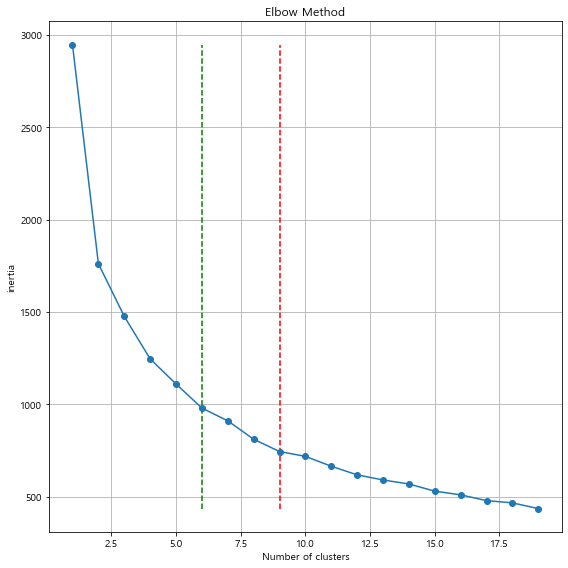

In [133]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,20),inertia_arr, marker='o')
plt.vlines(6, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0004, linestyles='--',colors="g")
plt.vlines(9, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0004, linestyles='--',colors="r")

plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel("inertia")
plt.grid()
plt.tight_layout()
plt.show()

In [134]:
# 7로 군집
kmeans = KMeans(n_clusters =7,
                random_state=200,
               init='k-means++',
               n_init=10,
               max_iter=300).fit(kmeans_cluster_data)

In [135]:
# data 군집 결과 컬럼 추가
kmeans_cluster_data["cluster"]=kmeans.labels_
kmeans_cluster_data

,성별,연령대,기분,구름,휴일,식사시간,비,cluster
0,-0.839317,-0.184704,-0.891734,1.036588,1.409190,-0.600183,1.162736,1
1,1.191445,0.852103,2.450284,1.036588,1.409190,-0.600183,1.162736,6
2,-0.839317,-0.184704,0.222272,1.036588,1.409190,-0.600183,1.162736,1
3,1.191445,-0.184704,-0.891734,1.036588,1.409190,-0.600183,1.162736,6
4,-0.839317,-0.184704,-0.891734,1.036588,1.409190,0.827371,1.162736,1
...,...,...,...,...,...,...,...,...
416,-0.839317,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040,3
417,-0.839317,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040,3
418,1.191445,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040,3
419,-0.839317,1.888910,1.336278,-1.071642,-0.709628,0.827371,-0.860040,3


### 실루엣 계수 평가

In [136]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#추가 라벨이 붙지않는 오리지널 데이터(silhuette_data는 cluster나 silhouette_coeff같은 새 컬럼이 추가 될 예정)
origin_data=kmeans_silhuette_data.copy()

kmeans_silhuette_data['cluster'] = kmeans.labels_

# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(origin_data, kmeans_silhuette_data['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
# data 실루엣 계수 컬럼 추가
kmeans_silhuette_data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(origin_data, kmeans_silhuette_data['cluster'])
print('데이터셋 Silhouette Analysis Score:'.format(average_score))
print(average_score)
kmeans_silhuette_data.head(3)

silhouette_samples( ) return 값의 shape (421,)
데이터셋 Silhouette Analysis Score:
0.3212651219454323


,성별,연령대,기분,구름,휴일,식사시간,비,cluster,silhouette_coeff
0,-0.839317,-0.184704,-0.891734,1.036588,1.40919,-0.600183,1.162736,1,0.279427
1,1.191445,0.852103,2.450284,1.036588,1.40919,-0.600183,1.162736,6,0.253415
2,-0.839317,-0.184704,0.222272,1.036588,1.40919,-0.600183,1.162736,1,0.286388


In [137]:
kmeans_silhuette_data.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.156196
1    0.477831
2    0.191390
3    0.255290
4    0.217506
5    0.340437
6    0.466433
Name: silhouette_coeff, dtype: float64

### k-means 최적 군집 실루엣 시각화

In [138]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=300, random_state=200)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

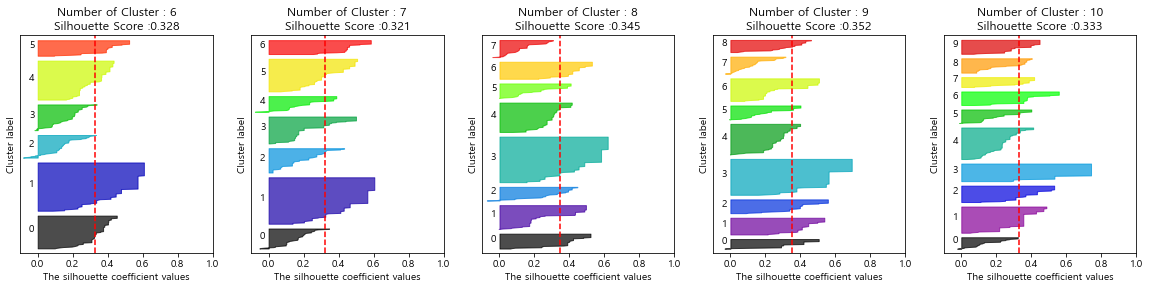

In [139]:
visualize_silhouette([6,7,8,9,10], origin_data)

### TSNE로  군집 확인

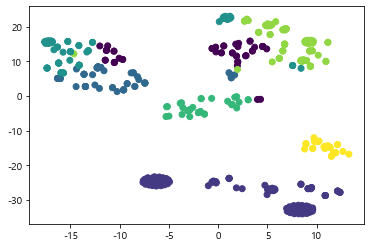

In [140]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(kmeans_cluster_data.iloc[:,:7])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

#군집별로 잘 구분이 된 것을 알 수 있다.

In [152]:
kmeans_cluster_data.groupby(['cluster',"비"]).mean()

성별       연령대        기분        구름        휴일      식사시간
cluster 비                                                                    
0       -0.860040  0.514524  0.114818  1.608591 -0.813970 -0.709628 -0.029161
         1.162736  1.191445  0.333699  1.893281  0.509531 -0.709628  0.827371
1       -0.860040 -0.839317 -0.184704  0.222272  1.036588  1.409190  0.827371
         1.162736 -0.839317 -0.804851  0.045280  1.016885  1.409190  0.800687
2       -0.860040 -0.589925  0.160898 -0.129519 -0.054513 -0.709628 -1.526840
3       -0.860040 -0.355803  1.362278 -0.467351 -1.004714 -0.709628  0.260881
4        1.162736 -0.180692 -0.016573 -0.108919  0.837161 -0.709628 -0.793095
5       -0.860040  1.164724 -0.198347 -0.627891 -0.932943 -0.709628 -0.149376
6        1.162736  1.191445  0.035224  0.222272  0.972703  1.409190  0.740852

# kmedia 군집

### elbow method

C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\

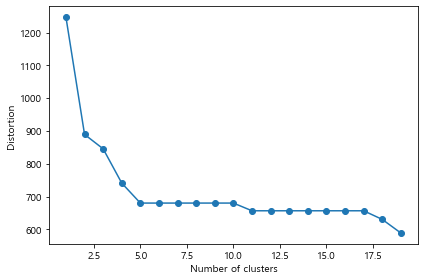

In [142]:
from sklearn_extra.cluster import KMedoids
dist =[]
for i in range(1,20):
    kmedoids = KMedoids(n_clusters =i,
                random_state=200,
               max_iter=300)
    kmedoids.fit(kmedia_cluster_data)
    dist.append(kmedoids.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [143]:
#k값을 4로 설정 후 k-mediods에 적용시키기
kmedoids = KMedoids(n_clusters =4,
                random_state=200,
               max_iter=300).fit(kmedia_cluster_data)
kmedoids.cluster_centers_

array([[-0.83931725, -0.18470441,  0.22227201,  1.03658849, -0.70962767,
        -0.60018279,  1.16273613],
       [-0.83931725,  1.88891047,  0.22227201, -1.07164221, -0.70962767,
        -0.60018279, -0.86004036],
       [-0.83931725, -1.22151186,  0.22227201,  1.03658849,  1.4091897 ,
         0.82737063,  1.16273613],
       [ 1.1914446 , -0.18470441,  0.22227201, -1.07164221, -0.70962767,
        -0.60018279, -0.86004036]])

In [144]:
# data 군집 결과 컬럼 추가
kmedia_cluster_data["cluster"]=kmedoids.labels_
kmedia_cluster_data

,성별,연령대,기분,구름,휴일,식사시간,비,cluster
0,-0.839317,-0.184704,-0.891734,1.036588,1.409190,-0.600183,1.162736,2
1,1.191445,0.852103,2.450284,1.036588,1.409190,-0.600183,1.162736,0
2,-0.839317,-0.184704,0.222272,1.036588,1.409190,-0.600183,1.162736,2
3,1.191445,-0.184704,-0.891734,1.036588,1.409190,-0.600183,1.162736,2
4,-0.839317,-0.184704,-0.891734,1.036588,1.409190,0.827371,1.162736,2
...,...,...,...,...,...,...,...,...
416,-0.839317,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040,1
417,-0.839317,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040,1
418,1.191445,1.888910,-0.891734,-1.071642,-0.709628,0.827371,-0.860040,1
419,-0.839317,1.888910,1.336278,-1.071642,-0.709628,0.827371,-0.860040,1


## kmedia 실루엣 계수 평가

In [145]:
from sklearn.preprocessing import scale
from sklearn_extra.cluster import KMedoids
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#추가 라벨이 붙지않는 오리지널 데이터(silhuette_data는 cluster나 silhouette_coeff같은 새 컬럼이 추가 될 예정)
origin_data=kmedia_silhuette_data.copy()

kmedia_silhuette_data['cluster'] = kmedoids.labels_

# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(origin_data, kmedia_silhuette_data['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
# data 실루엣 계수 컬럼 추가
kmedia_silhuette_data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(origin_data, kmedia_silhuette_data['cluster'])
print('데이터셋 Silhouette Analysis Score:'.format(average_score))
print(average_score)
kmedia_silhuette_data.head(3)

silhouette_samples( ) return 값의 shape (421,)
데이터셋 Silhouette Analysis Score:
0.29999596101879616


,성별,연령대,기분,구름,휴일,식사시간,비,cluster,silhouette_coeff
0,-0.839317,-0.184704,-0.891734,1.036588,1.40919,-0.600183,1.162736,2,0.284655
1,1.191445,0.852103,2.450284,1.036588,1.40919,-0.600183,1.162736,0,-0.135224
2,-0.839317,-0.184704,0.222272,1.036588,1.40919,-0.600183,1.162736,2,0.313176


In [146]:
kmedia_silhuette_data.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.179153
1    0.259105
2    0.511914
3    0.162384
Name: silhouette_coeff, dtype: float64

### 실루엣 계수 시각화로 최적 군집 수 찾기

In [147]:
def visualize_silhouette2(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn_extra.cluster import KMedoids
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMedoids(n_clusters = n_cluster, max_iter=300, random_state=200)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

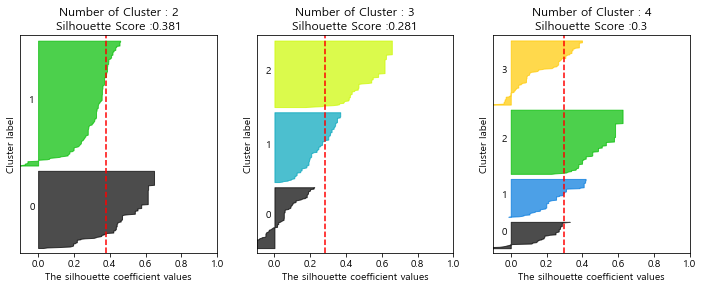

In [148]:
visualize_silhouette2([2,3,4], origin_data)

### TSNE로  군집 확인

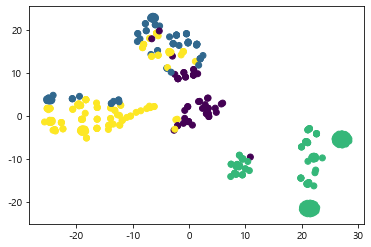

In [149]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(kmedia_cluster_data.iloc[:,:7])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmedoids.labels_)

plt.show()

#군집별로 잘 구분이 된 것을 알 수 있다.

In [150]:
kmedia_cluster_data.groupby('cluster').mean()

,성별,연령대,기분,구름,휴일,식사시간,비
cluster,,,,,,,
0,-0.419160,-0.023821,0.010995,0.800321,-0.673096,-1.043217,0.430352
1,-0.325510,1.426719,-0.153537,-0.931940,-0.709628,-0.170197,-0.860040
2,-0.375143,-0.614239,0.071085,1.006471,1.409190,0.796780,1.148288
3,0.741776,-0.221733,0.015385,-0.785525,-0.709628,-0.263688,-0.816695
